# $$ \text{Linear Classifier : The perceptron algorithm} $$

    The features correspond to two numbers corresponding to the appearances of aack and beep. The labels are 1 for the happy sentences and 0 for the sad ones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16,11)
matplotlib.rcParams['figure.dpi'] = 300

### Author's code 

In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, **kwargs)

## Defining the dataset 

In [2]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

In [3]:
len(features)
[features[i][0] for i in range(len(features))]

[1, 0, 1, 1, 1, 2, 2, 3]

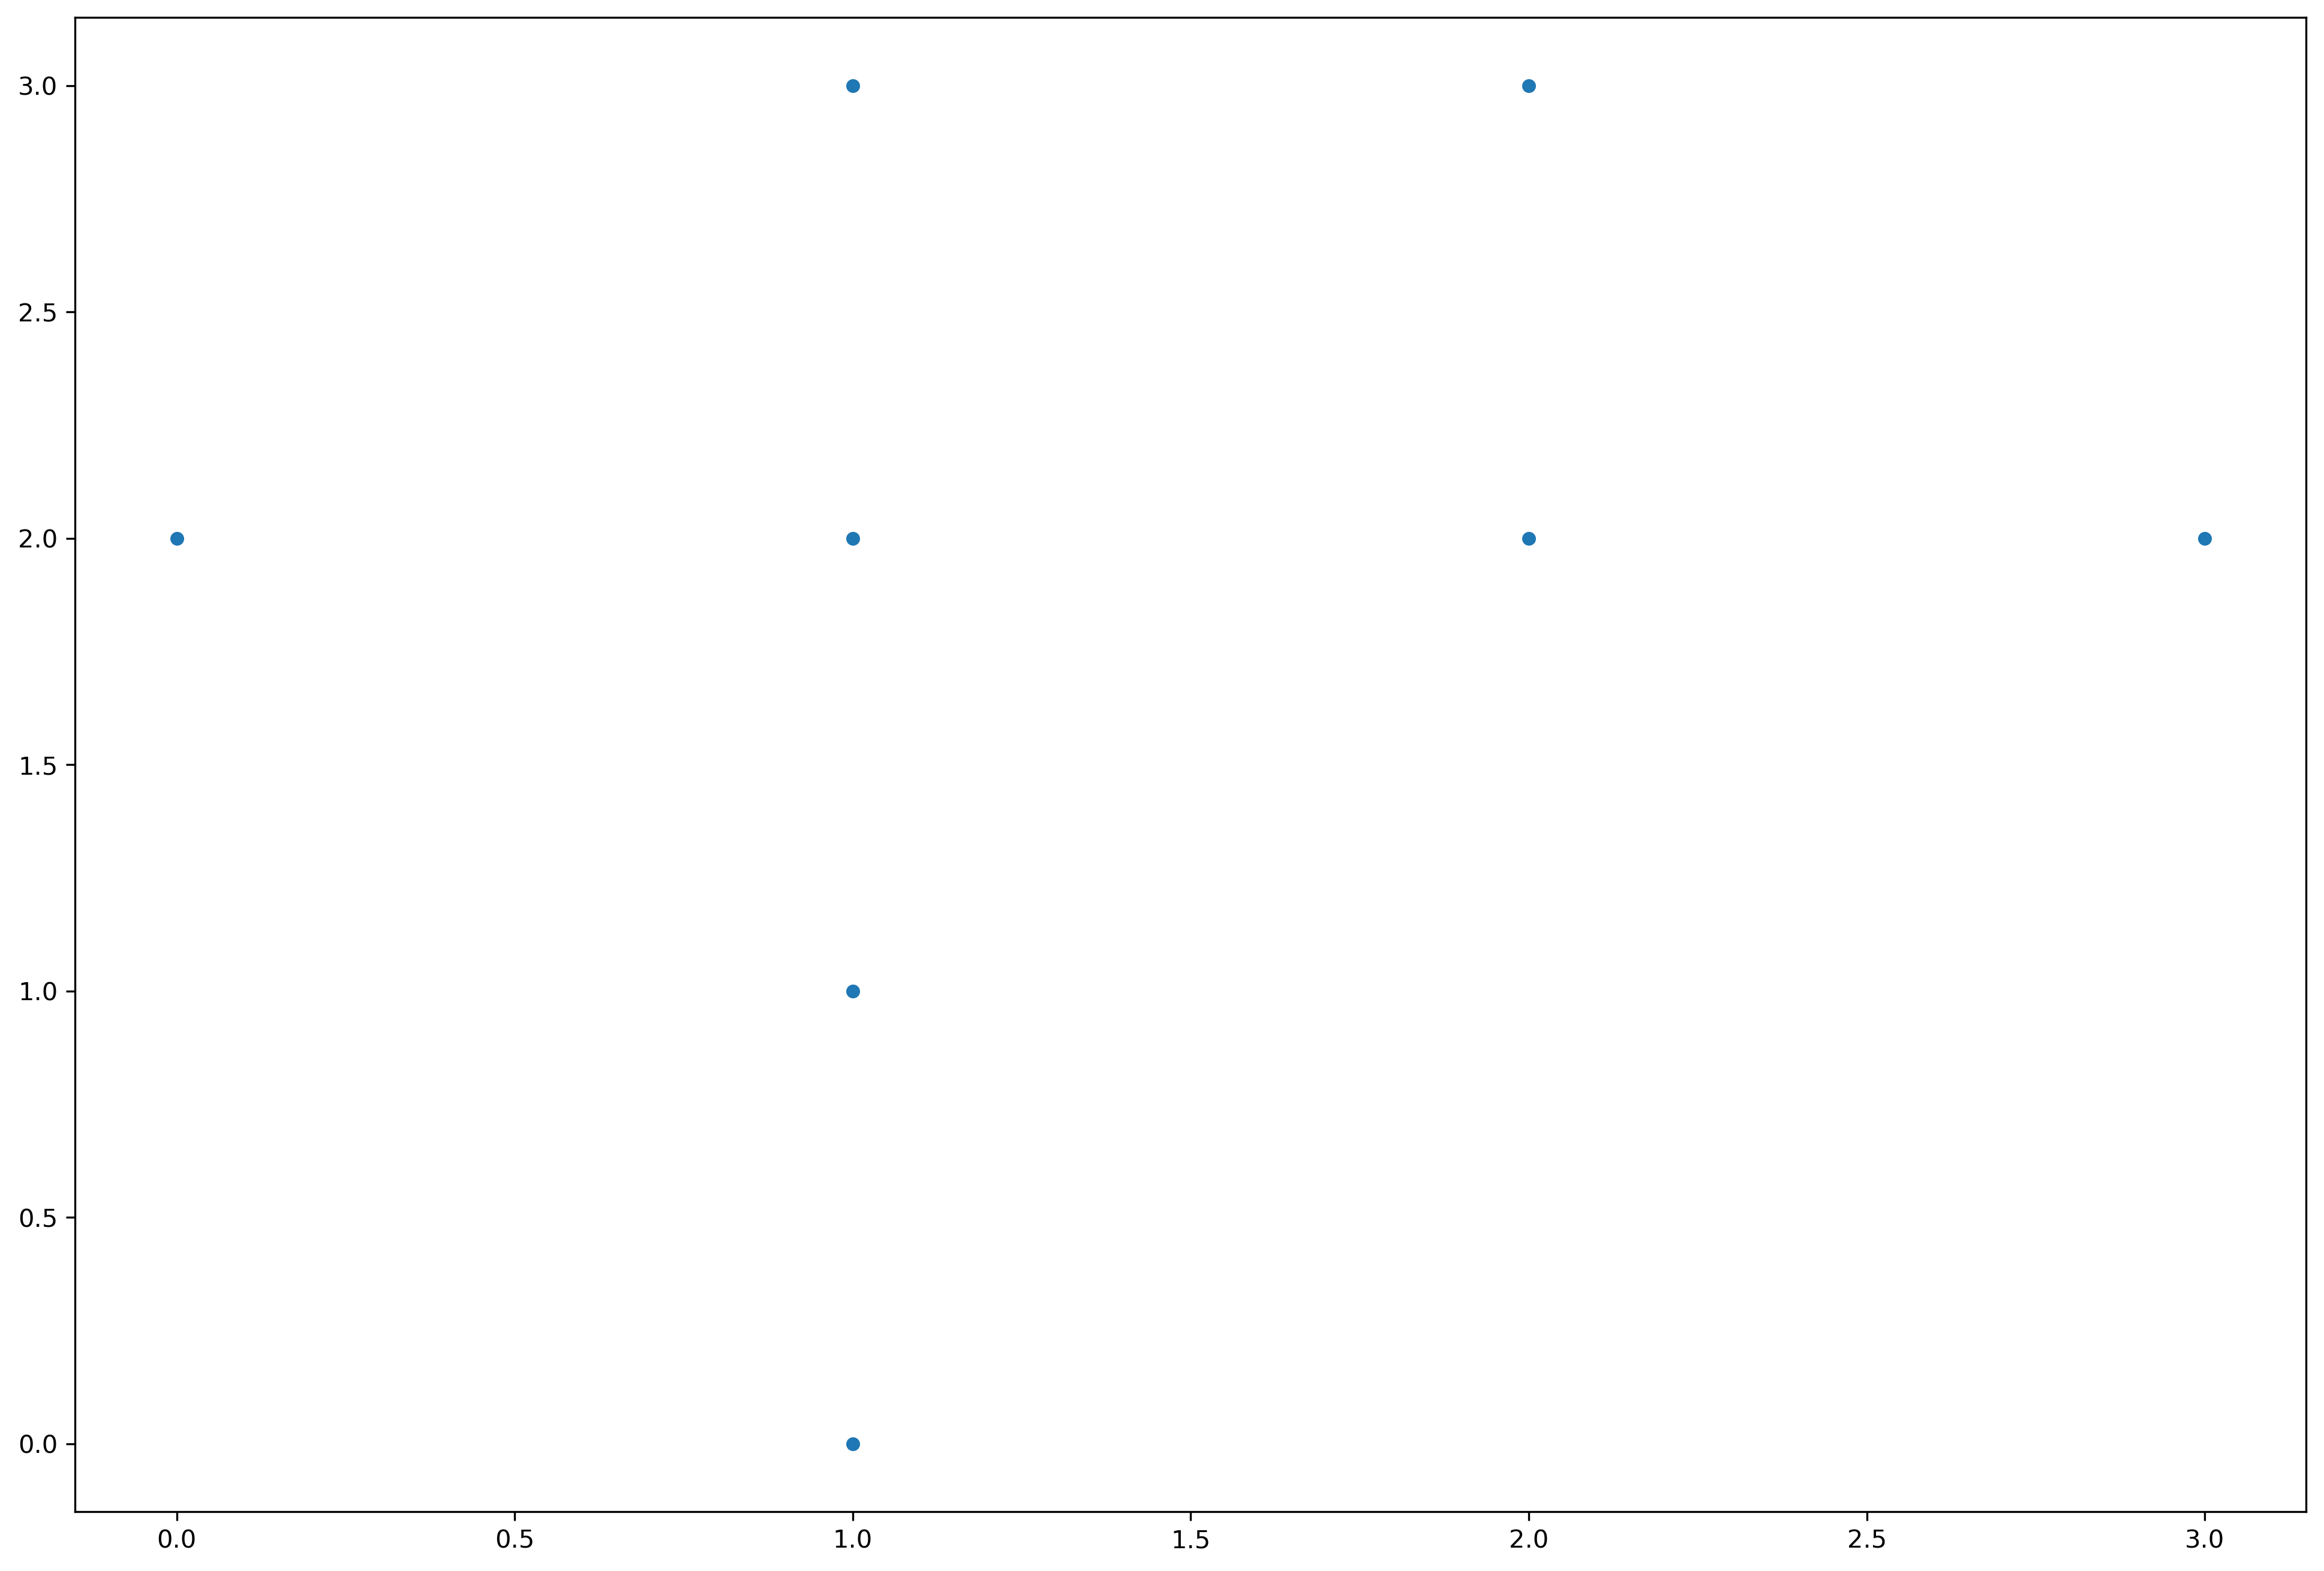

In [17]:
sns.scatterplot(x=[features[i][0] for i in range(len(features))],
               y = [features[i][1] for i in range(len(features))],
               markers=['o', 'x'])
plt.show()

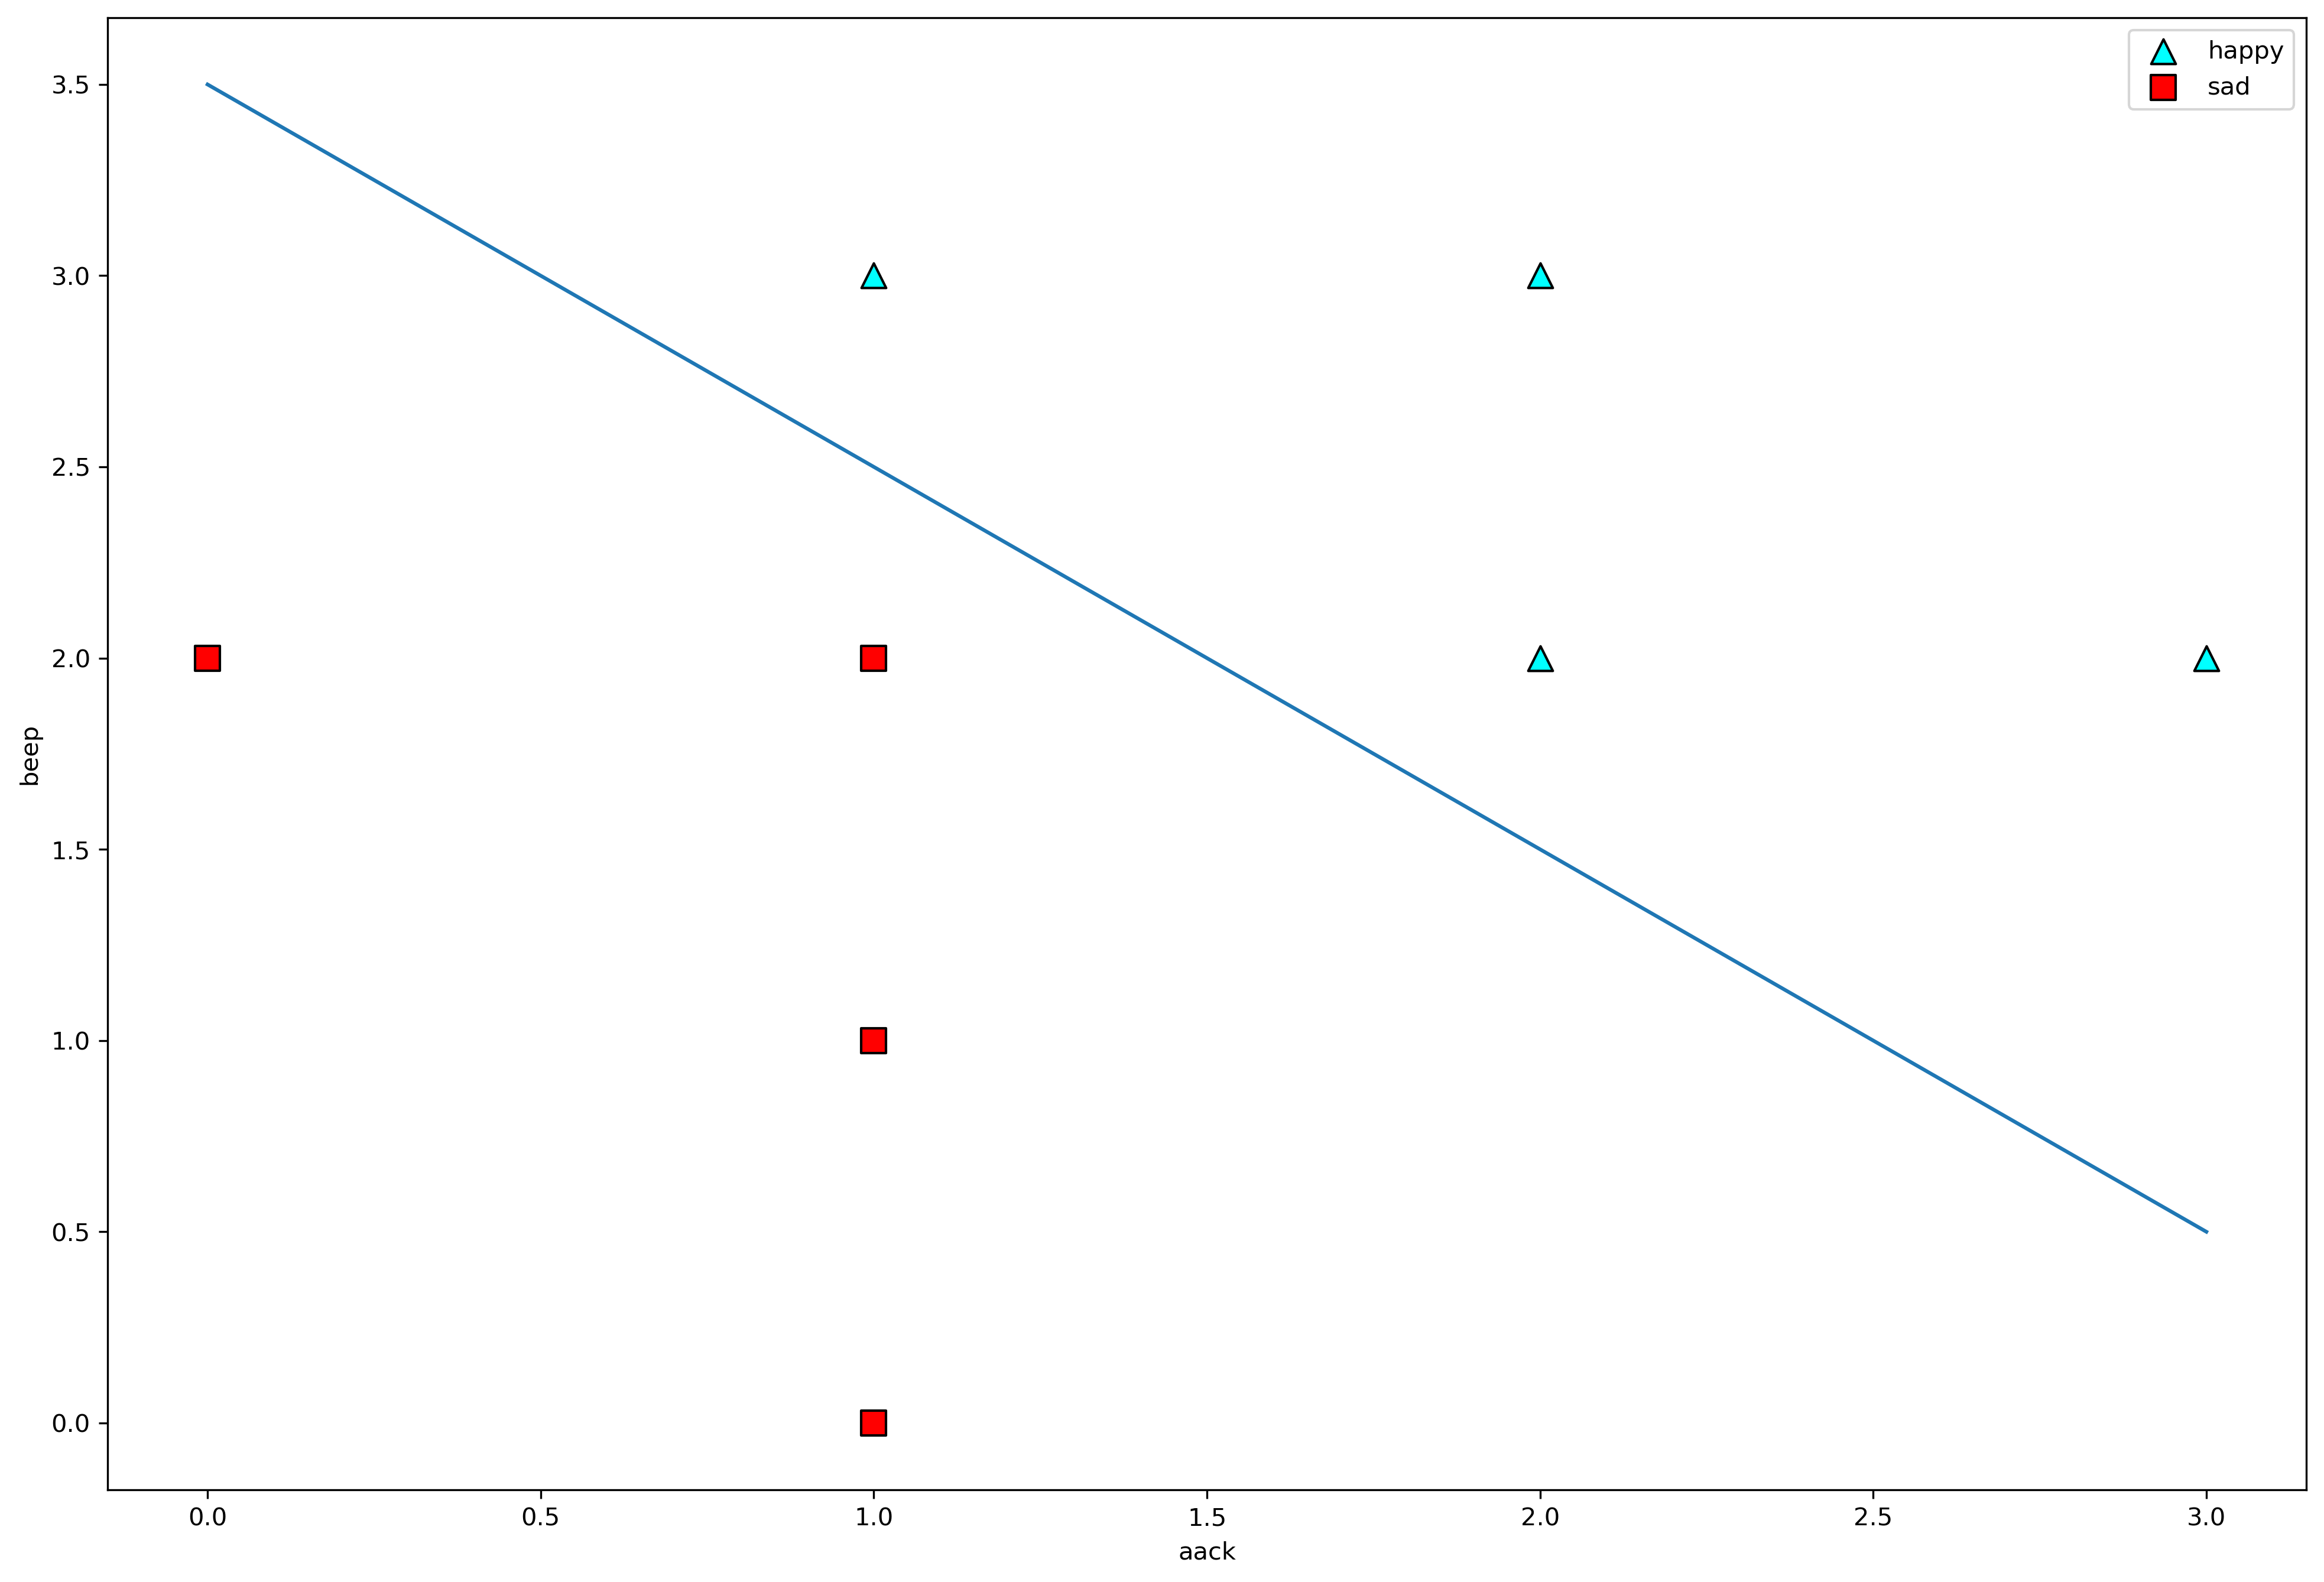

In [20]:
plot_points(features, labels)
draw_line(1,1,-3.5)

## Coding the perceptron trick 

In [22]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)


In [23]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


## Using simple packages 

In [4]:
import turicreate as tc

datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
data = tc.SFrame(datadict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [5]:
perceptron = tc.logistic_classifier.create(dataset=data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.012172     | 1.000000          |

| 2         | 3        | 1.014319     | 1.000000          |

| 3         | 4        | 1.016492     | 1.000000          |

| 4         | 5        | 1.017934     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [6]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502
